In [122]:
import pandas as pd
from __future__ import division
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [104]:
df = pd.read_csv('S&P500_Data.csv')
df.head()

,Date,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
0,2017-01-03,46.074703,45.816051,170.237915,113.847588,59.784031,80.855621,37.982937,114.158501,103.480003,...,36.900692,57.513260,86.670731,58.294228,26.833357,48.875042,61.848686,102.513084,42.586197,53.118965
1,2017-01-04,46.679256,46.211868,171.634933,113.720161,60.626999,82.862099,38.284462,114.432961,104.139999,...,37.027840,57.094593,85.717155,58.771557,27.845938,49.603493,62.073734,103.455551,43.197666,53.634392
2,2017-01-05,46.124260,45.410336,171.515182,114.298462,61.086800,81.902901,38.615170,112.717552,105.910004,...,36.607288,56.403305,84.439362,58.005840,27.729099,49.150673,62.279217,104.120262,42.497429,53.455975
3,2017-01-06,47.561314,45.726990,169.269974,115.572708,61.105961,82.999107,39.665661,114.001671,108.300003,...,36.568165,57.493786,84.391678,57.966064,27.300703,48.806133,63.032623,104.130180,42.773582,53.624477
4,2017-01-09,47.709969,46.587898,169.170197,116.631294,61.508286,83.664680,39.626755,112.727356,108.570000,...,35.952015,57.503525,82.999451,58.145061,27.144920,48.599411,63.208748,106.154053,42.310051,53.475800


In [105]:
df = df.drop(['Date'],axis=1)

In [106]:
X = pd.DataFrame(columns=df.columns)
X = X.append(df.mean(),ignore_index=True)
X = X.append(df.std(),ignore_index=True)
X = X.append(df.max(),ignore_index=True)
X = X.append(df.min(),ignore_index=True)
X = X.append((df.loc[1]-df.loc[294])/(df.loc[1]+0.0002),ignore_index=True)

In [107]:
X.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
0,60.739550,48.129606,121.079575,152.203204,79.214971,86.832232,49.676066,132.490910,151.872848,82.316920,...,40.078936,64.692990,79.889458,61.276894,29.477630,58.703414,72.965291,118.534563,45.267900,63.282997
1,7.523666,3.812878,26.739201,16.213838,18.010996,6.853118,6.407851,15.414089,27.337365,6.129472,...,3.076620,5.704682,2.799934,3.553700,1.900677,8.879065,6.783989,5.240749,4.405313,8.128276
2,74.820000,58.357773,174.419006,178.970001,123.209999,105.069321,63.419998,164.740005,212.149994,97.239998,...,55.919998,75.901245,88.168411,68.488602,34.130001,76.260002,86.081223,132.071793,56.540001,83.300003
3,46.074703,40.017048,79.331688,113.720161,58.055347,72.599739,37.982937,110.972725,103.480003,69.780792,...,34.020000,53.953701,74.638931,52.642029,26.833357,46.266403,61.848686,102.513084,38.599903,52.151344
4,-0.459104,-0.159225,0.309056,-0.553549,-0.889584,-0.142862,-0.590198,-0.380983,-1.035815,-0.298476,...,-0.509942,-0.295743,0.111263,0.040862,-0.078792,-0.517633,-0.311020,-0.141456,-0.308866,-0.519732


In [108]:
X= X.fillna(X.mean())

In [109]:
X = X.T

In [110]:
X.describe()

,0,1,2,3,4
count,477.000000,477.000000,477.000000,477.000000,477.000000
mean,99.430960,10.459279,122.272144,80.463277,-0.887761
std,125.035979,15.258248,159.426357,102.490151,16.708460
min,1.274597,0.299088,7.180000,0.110000,-363.050971
25%,45.755490,3.812878,55.743759,37.496147,-0.376610
50%,72.965291,6.307900,85.788559,60.409145,-0.189337
75%,117.321213,11.968258,140.786255,93.259918,0.015949
max,1698.966046,182.355288,2085.510010,1477.569946,37.254886


In [111]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS

In [112]:
sc = StandardScaler()
mm = MinMaxScaler()
sc.fit(X)
mm.fit(X)
Xs = pd.DataFrame(sc.transform(X),columns=X.columns)
Xmm = pd.DataFrame(mm.transform(X),columns=X.columns)

In [114]:
pca = PCA(n_components=2)
pca.fit(Xs)
Xp = pd.DataFrame(pca.transform(Xs),columns=['p1','p2'])

In [115]:
mds = MDS(n_components=2)
Xm = pd.DataFrame(mds.fit_transform(Xmm),columns=['d1','d2'])

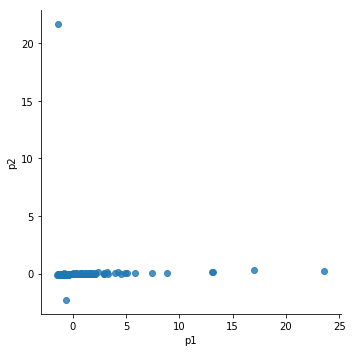

In [117]:
sns.lmplot(data=Xp,x='p1',y='p2',fit_reg=False)

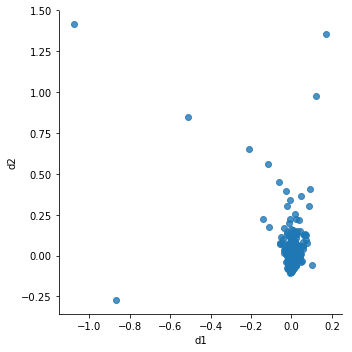

In [118]:
sns.lmplot(data=Xm,x='d1',y='d2',fit_reg=False)

In [119]:
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.mixture import GMM

In [120]:
lst_inertia = []
for k in range(2,11):
    cl = KMeans(n_clusters=k)
    cl.fit(Xmm)
    lst_inertia.append(cl.inertia_)

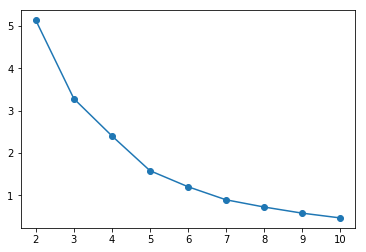

In [123]:
plt.plot(range(2,11),lst_inertia,marker='o')

In [124]:
cl = AgglomerativeClustering(n_clusters=4)

In [137]:
Xp['cl']=Xmm['cl'] = Xm['cl']=Xp['cl'] =X['cl']= cl.fit_predict(Xmm)

In [127]:
from sklearn.feature_selection import SelectKBest

In [129]:
sk = SelectKBest(k=5)
sk.fit(Xmm[[0,1,2,3,4]],Xmm['cl'])

SelectKBest(k=5, score_func=<function f_classif at 0x7ffa11944848>)

In [131]:
var_best= [x for x,y in zip([0,1,2,3,4],sk.get_support()) if y]
var_best

[0, 1, 2, 3, 4]

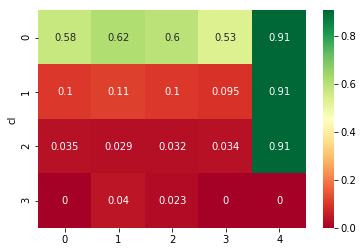

In [132]:
sns.heatmap(Xmm[['cl']+var_best].groupby('cl').mean(),annot=True,cmap='RdYlGn')

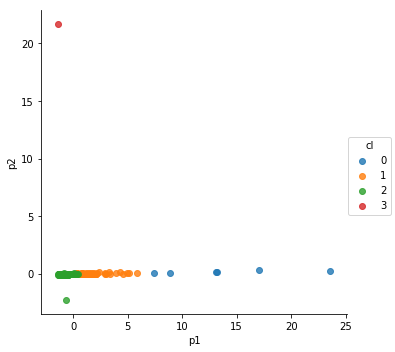

In [133]:
sns.lmplot(data=Xp,x='p1',y='p2',hue='cl',fit_reg=False)

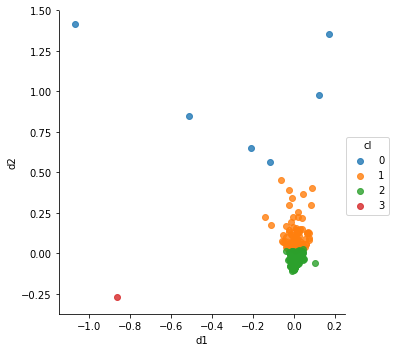

In [134]:
sns.lmplot(data=Xm,x='d1',y='d2',hue='cl',fit_reg=False)

In [139]:
X.loc[X['cl']==3]

,0,1,2,3,4,cl
WELL,1.274597,7.626933,54.07,0.11,-363.050971,3
